# Προχωρημένες Υπολογιστικές Μέθοδοι Ι
## Homework 1 - Jacobi Method
### Synetos Giorgos - Aravanis Dimitris

In [1]:
#-------------------------------
#Import Library & Settings
#-------------------------------
import numpy as np
#from IPython.core.display import display, HTML
from IPython.display import display, Markdown, Latex
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline

# Poisson equation

$ \bigtriangledown ^2  \Phi =4 $

subject to B.C:  $ Φ(x,y) = x^2 + y^2 $



### Grid Definition
For the present demonstration  we are considering a grid of 5x5. 

However the grid can be adjsuted.

In [2]:
#-------------------------------
#Set the Grid
#-------------------------------

L, H = 1,1 #Size of the grid (Length,Height)
IM,JM =4,4 #Number of columns & rows
Dx,Dy = L/(IM-1) , H/(JM-1)
a = Dx/Dy 
f = 4 # Η τιμή απο τη εξίσωση Poison που καλούμαστε να λύσουμε

# Set array size and set the interior value with v_init
v_init = 0 #initial guess for interior nodes
v = np.empty((JM, IM))
v_new = np.empty((JM, IM))
A= np.empty((JM, IM))


v.fill(v_init)

### Analytical Solution {u}

In [3]:
u = np.empty((JM, IM))
for i in range(JM):
    for j in range(IM):
        u[i, j] = (j*Dx)**2 + (i*Dy)**2
uk = u.flatten()


### Boundary Conditions

In [4]:
#-------------------------------
#Set Boundary conditions
#-------------------------------

#Top Boundary
bc_top = np.empty(IM)
for i in range(IM):
    bc_top[i] = (i*Dx)**2 + ((JM-1)*Dy)**2
v[(JM-1):, :] = bc_top

  
#Bottom Boundary
bc_bottom = np.empty(IM)
for i in range(IM):
    bc_bottom[i] = (i*Dx)**2
v[:1, :] = bc_bottom


#Right Boundary
bc_right = np.empty(JM)
for i in range(JM):
    bc_right[i] = (i*Dy)**2 + ((IM-1)*Dx)**2
bc_right = bc_right[np.newaxis, :].T
v[:, (IM-1):] = bc_right

#Left Boundary
bc_left = np.empty(JM)
for i in range(0, JM):
    bc_left[i] = (i*Dy)**2
bc_left = bc_left[np.newaxis, :].T
v[:, :1] = bc_left 

vk = v.flatten()


### Boundary Nodes

In [5]:
BN = list()

#Nodes located on Bottom
for k in range (IM):
    BN.append(k)
#Nodes located on Top
for k in range ((IM*(JM-1)),IM*JM):
    BN.append(k)
#Nodes located on the Left Side excluding first and last node
for i in range (1,JM-1):
    k = i*(IM)
    BN.append(k)
#Nodes located on the Right Side excluding first and last node
for i in range (1,JM-1):
    k = (i+1)*IM-1
    BN.append(k)
BN = sorted(BN)


### Vector b


In [6]:
b = np.empty(IM*JM)
for k in range (IM*JM):
    if k not in BN:
        b[k]=4

### Matrix A

In [7]:
dim = (IM*JM,IM*JM)
A = np.zeros(dim)

#Boundary Nodes A[i,i]=1
for index in BN:
    A[index,index] = 1

    
#Inner Nodes
for k in range (IM*JM):
    if k not in BN:
        A[k,k]= -2*(Dx**2+Dy**2)/((Dx**2) * (Dy**2))
        vertical_neighbours = [k+IM,k-IM]
        for v_neighbour in vertical_neighbours:
            A[k,v_neighbour]= Dx**2/((Dx**2) * (Dy**2))
        horizontal_neighbours = [k+1,k-1]
        for h_neighbour in horizontal_neighbours:
            A[k,h_neighbour]= Dy**2/((Dx**2) * (Dy**2))



            

### Matrix A Decomposition
[A]{x} = {b} is transformed into ( [D] - [L] - [U] ){x}=b

In [8]:
Diag = np.diag(np.diag(A))
Lower = np.tril(A,-1)
Upper = np.triu(A,1)

### Further Simplifications
Define T = inv.D (L+U)
and    c = inv.D {b}
Jacobi method is written as
{x_new} = [T]{x_old}+[c]

In [9]:
# T = np.dot(np.linalg.inv(D),(L+U))
# c = np.dot(np.linalg.inv(D),b)

### Conditional Number

In [10]:
def conditional_number(matrix):
    inv_matrix = np.linalg.inv(matrix)
    cond_a = np.linalg.norm(matrix) * np.linalg.norm(inv_matrix)
    return cond_a

cond_a = conditional_number(A)
print(cond_a)

288.385069932


### Jacobi Method

In [11]:
k=5
Upper[k][k+1]

9.0

In [12]:
Jacobi = "yes"
if Jacobi == "yes":
    #-------------------------------
    #Jacobi Method
    #-------------------------------

    v_newk = vk[:]
    counter= list()
    residual = list()
    e = list()
    resid = list()
    error = list()
    res=1
    iteration = 0
    while res > 10**-6 and iteration in range(0, 1) :
        restot = 0
        vk[:]=v_newk
#         for i in range(1, JM-1):
#             for j in range(1, IM-1):
#                 k= i*IM + j
        for k in range (IM*JM):
            if k not in BN:
                #print("node k=",k)
                v_newk[k] = (-Upper[k,k+IM]*vk[k+IM] - Lower[k,k-IM]*vk[k-IM]- Upper[k,k+1]*vk[k+1] - Lower[k,k-1]*vk[k-1] + b[k] )/ Diag[k,k]
                print("v_new=",v_newk)
                print("Av[k]=",np.dot(A[k],vk))
                res = np.dot(A[k],v_newk)
                print(res)

        

        #res = np.linalg.norm(restot)

        #Convergence data
        counter.append(iteration)
        residual.append(res)
        iteration += 1

        #Error
        e = (uk - v_newk)
        error.append(np.linalg.norm(e))
        
    print("After",iteration," iterations,",
          "the residual on the final iteration is ",res)

print("error=",e)
    
    
v_new = v_newk.reshape(JM,IM)
v_newk

v_new= [ 0.          0.11111111  0.44444444  1.          0.11111111 -0.05555556
  0.          1.11111111  0.44444444  0.          0.          1.44444444
  1.          1.11111111  1.44444444  2.        ]
Av[k]= 4.0
4.0
v_new= [ 0.          0.11111111  0.44444444  1.          0.11111111 -0.05555556
  0.26388889  1.11111111  0.44444444  0.          0.          1.44444444
  1.          1.11111111  1.44444444  2.        ]
Av[k]= 4.0
4.0
v_new= [ 0.          0.11111111  0.44444444  1.          0.11111111 -0.05555556
  0.26388889  1.11111111  0.44444444  0.26388889  0.          1.44444444
  1.          1.11111111  1.44444444  2.        ]
Av[k]= 4.0
4.0
v_new= [ 0.          0.11111111  0.44444444  1.          0.11111111 -0.05555556
  0.26388889  1.11111111  0.44444444  0.26388889  0.74305556  1.44444444
  1.          1.11111111  1.44444444  2.        ]
Av[k]= 4.0
4.0
After 1  iterations, the residual on the final iteration is  4.0
error= [ 0.          0.          0.          0.          0.    

array([ 0.        ,  0.11111111,  0.44444444,  1.        ,  0.11111111,
       -0.05555556,  0.26388889,  1.11111111,  0.44444444,  0.26388889,
        0.74305556,  1.44444444,  1.        ,  1.11111111,  1.44444444,  2.        ])

In [13]:
k=5
A[5]

array([  0.,   9.,   0.,   0.,   9., -36.,   9.,   0.,   0.,   9.,   0.,
         0.,   0.,   0.,   0.,   0.])

## Plots

In the following figures the counter lines and the convergence are presented.

#### Counter Lines

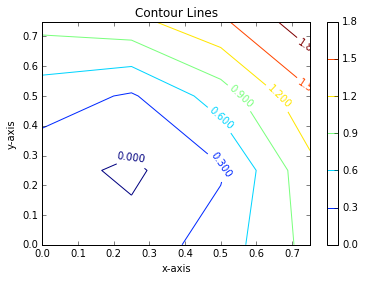

In [14]:
# Create Grid
X, Y = np.meshgrid(np.arange(0, L, L/IM), np.arange(0, H, H/JM))
# Configure the contour
cp = plt.contour(X, Y, v_new)
plt.clabel(cp, inline=True, fontsize=10)
plt.title("Contour Lines")
plt.xlabel('x-axis')
plt.ylabel('y-axis')


# Set Colorbar
plt.colorbar()

# Show the result in the plot window
plt.show()

#### Convergence Plot

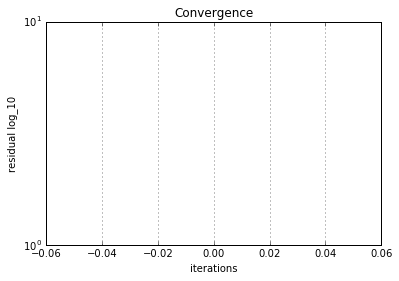

In [15]:
#plot convergence
plt.plot(counter, residual)
plt.yscale('symlog')
plt.title('Convergence')
plt.xlabel('iterations')
plt.ylabel('residual log_10')
plt.grid(True)
plt.show()



### Error Plot

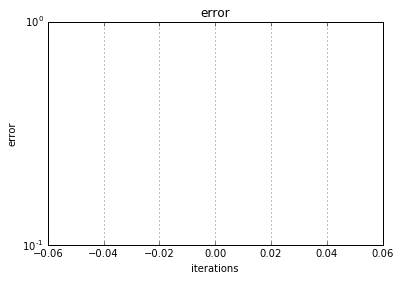

In [16]:
#plot error
plt.plot(counter, error)
plt.title('error')
plt.yscale('symlog')
plt.xlabel('iterations')
plt.ylabel('error')
plt.grid(True)
plt.show()